<a href="https://colab.research.google.com/github/krislars/hydrogen/blob/master/Hydrogen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hydrogen Atom

Kristen Larson, Western Washington University 

In [0]:
# You may want to comment this line out if running on your own system
!pip install sympy==1.3

    100% |████████████████████████████████| 5.9MB 998kB/s 
  Stored in directory: /root/.cache/pip/wheels/6c/59/86/478e3c0f298368c119095cc5985dedac57c0e35a85c737f823
Successfully built sympy
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


In [0]:
from sympy import Symbol,integrate,conjugate,plot,diff,solve,sin,cos,oo,pi
from sympy.plotting import plot_parametric,plot3d_parametric_surface
from sympy.physics.hydrogen import R_nl,Psi_nlm,Ynm

In [0]:
r=Symbol("r", real=True, positive=True)
phi=Symbol("phi", real=True)
theta=Symbol("theta", real=True)

## Radial Part, $R_{nl}(r)$

Using Sympy (Symbolic Python, like Mathematica), we can access the hydrogen wavefunctions directly.  Let's start with the radial part, R_nl(r).  Here are some cool things that you can do.
1. Print out the wavefunction

In [16]:
R_nl(2,0,r) 

sqrt(2)*(-r + 2)*exp(-r/2)/4

2. Integrate the wavefunction.  

The function below is the probability density integrated over all radii.  How would you change it to be an average?  Try it!  Notice that if you are expecting a radius, the answer is reported as a multiple of the Bohr radius.  Try changing the limits of integration.  What is the change of finding the particle outside of its average?

In [27]:
integrate(R_nl(2, 0, r)**2 * r**2, (r, 0, oo))

1

3.  Plot the wavefunction

Again, the plot below is the probability density.  How would you change it to plot the wavefunction?

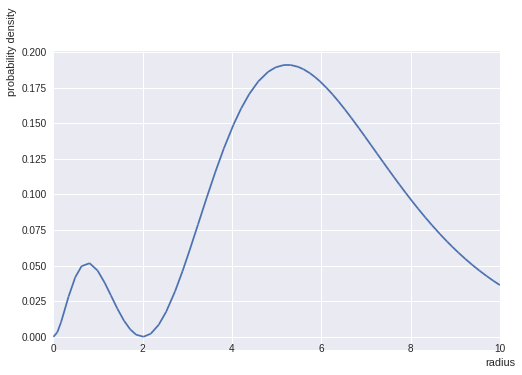

In [41]:
p1 = plot(R_nl(2, 0, r)**2 * r**2, (r, 0, 10), 
          xlabel='radius', ylabel='probability density')

4.  Differentiate the wavefunction.

Here we differentiate the probability density and set that equal to zero to find the maxima.  Guess what the answer is from the plot above, and then check your understanding below.

In [42]:
diff(R_nl(2, 0, r)**2 * r**2)

-r**2*(-r + 2)**2*exp(-r)/8 + r**2*(2*r - 4)*exp(-r)/8 + r*(-r + 2)**2*exp(-r)/4

In [63]:
zeros=solve(diff(R_nl(2, 0, r)**2 * r**2), r)
zeros

[2, -sqrt(5) + 3, sqrt(5) + 3]

In [65]:
zeros_eval=[x.evalf(3) for x in zeros]
zeros_eval

[2.00, 0.764, 5.24]

## Angular Part, $Y_{lm}(\theta, \phi)$

One strange thing about sympy is that the spherical harmonics are called Ynm, where nm are the two integers.  Since Y is the product of the two angular parts of the wavefunction, $\theta$ and $\phi$, we know those two quantum numbers as $l$ ("el") and $m$.  Sorry about that.

Here was can repeat what we did before.

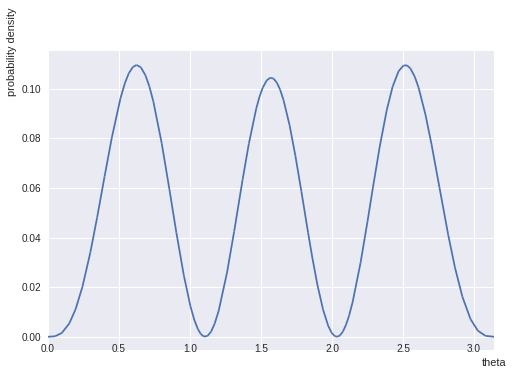

In [84]:
p3 = plot(Ynm(3, 1, theta, 0)**2 * sin(theta), (theta, 0, pi),
         xlabel='theta',ylabel='probability density')

A plot of probability density for angle on the x-axis is correct, but rather hard to visualize.  So, what we often do is make a polar plot where the angle is angle, and the distance from the axis is probability.  Notice the complex conjugate instead of the square in the next cell because now we are going to include $\phi$.

In [0]:
prob = Ynm(3,1,theta,phi)*conjugate(Ynm(3,1,theta,phi))*sin(theta)

The next part converts the spherical coordinates to x, y, and z coordinates.

/usr/local/lib/python3.6/dist-packages/sympy/plotting/experimental_lambdify.py:165: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  warnings.warn('The evaluation of the expression is'


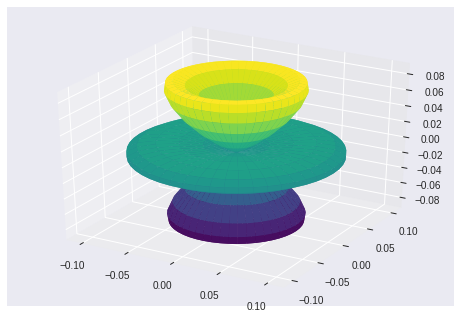

In [96]:
p4 = plot3d_parametric_surface( prob*sin(theta)*cos(phi),  
                           prob*sin(theta)*sin(phi), 
                           prob*cos(theta), (theta, 0, pi), (phi, 0, 2*pi))

The three "lobes" are there, but more easily visualized this way.  All three "lobes" go out to approximately the same distance from the origin because they have about the same maximum probability density.

We might instead want to show a surface of constant probability density, so that the distance from the origin is the probability of finding the particle at that distance.  This would be a nice student project... Who's interested?

## Full Wavefunction

Notice that you don't have to use just the radial part or the angular part, as sympy provides the whole wavefunction, $\psi_{nlm}(r,\theta,\phi)$.

Can you reproduce the exercises in the parts above with the whole wavefunction?  Here's the radial plot for a place to start:

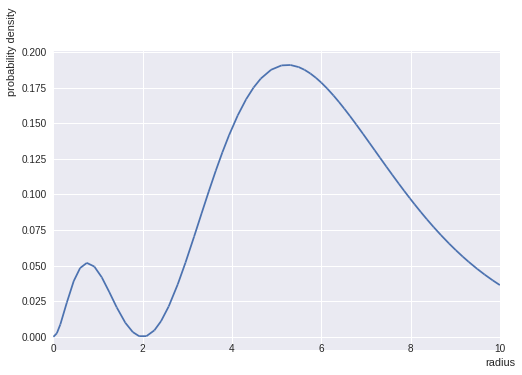

In [72]:
p2 = plot(Psi_nlm(2,0,0,r,phi=0,theta=0,Z=1)**2 * 4 * pi * r**2, (r, 0, 10),
          xlabel='radius', ylabel='probability density')